V.Harish
AIE22063

A1. Develop the above perceptronin your own code (don’t use the perceptron model available from package). Use the initial weights as provided below. W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Use Stepactivation function to learn the weights of the network to implement above provided AND gate logic. The activation function is demonstrated below.
Identify the number of epochs needed for the weights to converge in the learning process. 
Make a plot of the epochs against the error values calculated (after each epoch, calculate the sum-square-error against all training samples).

A2. Repeat the above A1 experiment with following activation functions. Compare the iterations 
taken to converge against each of the activation functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function

In [4]:
# Define the inputs and outputs for the AND gate
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 0, 0, 1]

# Define the initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

# Define the activation functions
import math

def bipolar_step(x):
  if x < 0:
    return -1
  else:
    return 1

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def relu(x):
  if x < 0:
    return 0
  else:
    return x

# Define the perceptron function
def perceptron(A, B, activation):
  # Compute the weighted sum
  weighted_sum = W0 + W1 * A + W2 * B
  # Apply the activation function
  output = activation(weighted_sum)
  return output

# Define a function to calculate the sum of squared errors
def error(activation):
  total_error = 0
  for i in range(len(inputs)):
    # Get the input and output pair
    A, B = inputs[i]
    T = outputs[i]
    # Get the perceptron output
    Z = perceptron(A, B, activation)
    # Calculate the squared error
    squared_error = (T - Z) ** 2
    # Add to the total error
    total_error += squared_error
  return total_error

# Define a function to train the perceptron with a given activation function
def train(activation):
  # Define global variables for the weights
  global W0, W1, W2
  # Define a list to store the errors for each epoch
  errors = []
  # Define a variable to track the number of epochs
  epochs = 0
  # Train the perceptron until the error is zero
  while error(activation) > 0:
    # Increment the number of epochs
    epochs += 1
    # Store the current error
    errors.append(error(activation))
    # Loop through the input and output pairs
    for i in range(len(inputs)):
      # Get the input and output pair
      A, B = inputs[i]
      T = outputs[i]
      # Get the perceptron output
      Z = perceptron(A, B, activation)
      # Update the weights
      if activation == bipolar_step:
        W0 = W0 + alpha * (T - Z) * 1
        W1 = W1 + alpha * (T - Z) * A
        W2 = W2 + alpha * (T - Z) * B
      elif activation == sigmoid:
        W0 = W0 + alpha * (T - Z) * Z * (1 - Z) * 1
        W1 = W1 + alpha * (T - Z) * Z * (1 - Z) * A
        W2 = W2 + alpha * (T - Z) * Z * (1 - Z) * B
      elif activation == relu:
        W0 = W0 + alpha * (T - Z) * 1
        W1 = W1 + alpha * (T - Z) * A
        W2 = W2 + alpha * (T - Z) * B
  # Return the final weights, number of epochs, and errors
  return W0, W1, W2, epochs, errors

# Define a list of activation functions
activations = [bipolar_step, sigmoid, relu]

# Loop through the activation functions
for activation in activations:
  # Reset the weights to the initial values
  W0 = 10
  W1 = 0.2
  W2 = -0.75
  # Train the perceptron with the activation function
  W0, W1, W2, epochs, errors = train(activation)
  # Print the results
  print("Activation function:", activation._name_)
  print("Final weights:")
  print("W0 =", W0)
  print("W1 =", W1)
  print("W2 =", W2)
  print("Number of epochs:", epochs)
  # Plot the errors against the epochs
  import matplotlib.pyplot as plt
  plt.plot(range(1, epochs + 1), errors)
  plt.xlabel("Epoch")
  plt.ylabel("Error")
  plt.title("Perceptron Learning Curve with " + activation._name_)
  plt.show()

A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning 
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for 
learning to converge against the learning rates.

Learning rate: 0.1
Number of epochs: 67
Learning rate: 0.2
Number of epochs: 36
Learning rate: 0.3
Number of epochs: 22
Learning rate: 0.4
Number of epochs: 22
Learning rate: 0.5
Number of epochs: 18
Learning rate: 0.6
Number of epochs: 18
Learning rate: 0.7
Number of epochs: 14
Learning rate: 0.8
Number of epochs: 13
Learning rate: 0.9
Number of epochs: 12
Learning rate: 1
Number of epochs: 11


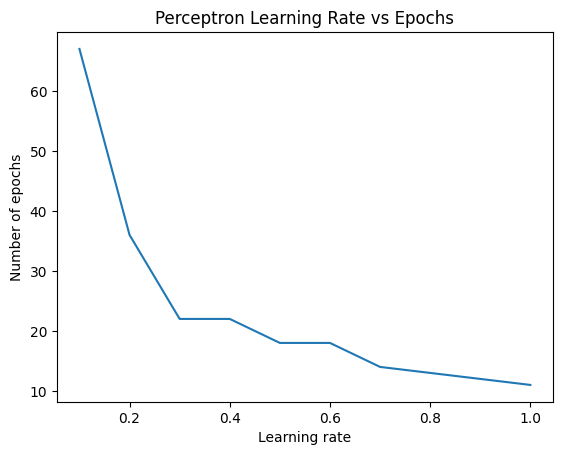

In [3]:
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 0, 0, 1]

#initial weights
W0=10
W1=0.2
W2=-0.75

#step function
def step(x):
  if x<0:
    return 0
  else:
    return 1

#perceptron function
def perceptron(A,B):
  # Compute the weighted sum
  weighted_sum=W0+W1*A+W2*B

  output = step(weighted_sum)
  return output

#sum of squared errors
def error():
  total_error = 0
  for i in range(len(inputs)):
    # Get the input and output pair
    A, B = inputs[i]
    T = outputs[i]
    # Get the perceptron output
    Z = perceptron(A, B)
    # Calculate the squared error
    squared_error = (T - Z) ** 2
    # Add to the total error
    total_error += squared_error
  return total_error

def train(alpha):
  global W0, W1, W2
  epochs = 0
  # Train the perceptron until the error is zero
  while error() > 0:
    # Increment the number of epochs
    epochs += 1
    # Loop through the input and output pairs
    for i in range(len(inputs)):
      # Get the input and output pair
      A, B = inputs[i]
      T = outputs[i]
      # Get the perceptron output
      Z = perceptron(A, B)
      # Update the weights
      W0 = W0 + alpha * (T - Z) * 1
      W1 = W1 + alpha * (T - Z) * A
      W2 = W2 + alpha * (T - Z) * B
  return epochs

#learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

epochs_list = []

for alpha in learning_rates:
  # Reset the weights to the initial values
  W0 = 10
  W1 = 0.2
  W2 = -0.75
  # Train the perceptron with the learning rate
  epochs = train(alpha)
  # Store the number of epochs
  epochs_list.append(epochs)
  # Print the results
  print("Learning rate:", alpha)
  print("Number of epochs:", epochs)

import matplotlib.pyplot as plt
plt.plot(learning_rates, epochs_list)
plt.xlabel("Learning rate")
plt.ylabel("Number of epochs")
plt.title("Perceptron Learning Rate vs Epochs")
plt.show()